<a href="https://colab.research.google.com/github/mvajhi/unsupervised-learning/blob/master/HW3/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

length of the training set: 60000
length of the test set: 10000


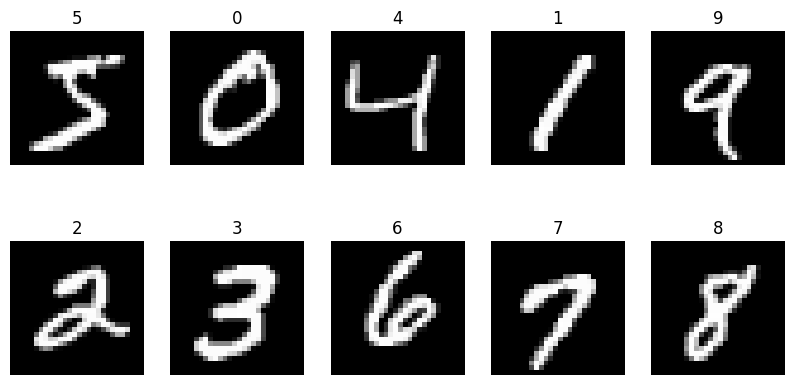

In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'

transform = torchvision.transforms.ToTensor()
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print('length of the training set: {}'.format(len(mnist_trainset)))
print('length of the test set: {}'.format(len(mnist_testset)))


figure = plt.figure(figsize=(10, 5))
cols, rows = 5, 2
displayed_labels = []

for img, label in mnist_trainset:
    if len(displayed_labels) == 10:
        break
    if label not in displayed_labels:
        ax = figure.add_subplot(rows, cols, len(displayed_labels) + 1)
        ax.set_title((label))
        ax.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
        displayed_labels.append(label)

plt.show()

# Preprocessing Step

برای انتخاب ۲۰۰ داده ۲۰۰ کلاستر می کنیم داده های آموزشی را سپس داده مرکزی هر کلاستر را انتخاب می کنیم. به این صورت ۲۰۰ داده خوبی را انتخاب کردیم.

In [2]:
from sklearn.cluster import KMeans
from scipy.spatial import distance
import numpy as np
from tqdm import tqdm

train_images_np = mnist_trainset.data.numpy()
train_labels_np = mnist_trainset.targets.numpy()
test_images_np = mnist_testset.data.numpy()
test_labels_np = mnist_testset.targets.numpy()

n_samples, nx, ny = train_images_np.shape
train_images_flattened = train_images_np.reshape((n_samples, -1))


n_clusters = 200
# kmeans = KMeans(n_clusters=n_clusters)
# kmeans.fit(train_images_flattened)

# selected_indices = []

# distances = kmeans.transform(train_images_flattened)

# for i in tqdm(range(n_clusters), desc="select sample"):
#     indices_in_cluster = np.where(kmeans.labels_ == i)[0]
#     cluster_distances = distances[indices_in_cluster, i]
#     index_of_closest_in_cluster = np.argmin(cluster_distances)
#     original_index = indices_in_cluster[index_of_closest_in_cluster]
#     selected_indices.append(original_index)

# print(selected_indices)

selected_indices = [np.int64(39080), np.int64(25982), np.int64(19671), np.int64(39666), np.int64(34544), np.int64(51290), np.int64(11431), np.int64(44233), np.int64(32736), np.int64(53153), np.int64(56550), np.int64(19880), np.int64(59332), np.int64(15984), np.int64(14422), np.int64(11360), np.int64(9319), np.int64(52606), np.int64(57946), np.int64(54614), np.int64(46382), np.int64(15583), np.int64(5087), np.int64(33815), np.int64(5209), np.int64(3632), np.int64(6561), np.int64(55415), np.int64(33305), np.int64(43049), np.int64(50163), np.int64(13151), np.int64(37549), np.int64(157), np.int64(18538), np.int64(43160), np.int64(54733), np.int64(28938), np.int64(43253), np.int64(25152), np.int64(10529), np.int64(12653), np.int64(33052), np.int64(27308), np.int64(5657), np.int64(36198), np.int64(28118), np.int64(50825), np.int64(21533), np.int64(51359), np.int64(46160), np.int64(13445), np.int64(5980), np.int64(7747), np.int64(59223), np.int64(59803), np.int64(24846), np.int64(54208), np.int64(28039), np.int64(1753), np.int64(41886), np.int64(36288), np.int64(4035), np.int64(23639), np.int64(50213), np.int64(32508), np.int64(26130), np.int64(43876), np.int64(50900), np.int64(50209), np.int64(6567), np.int64(25370), np.int64(2945), np.int64(34513), np.int64(2057), np.int64(46220), np.int64(45146), np.int64(9848), np.int64(41868), np.int64(35101), np.int64(18576), np.int64(59540), np.int64(10619), np.int64(347), np.int64(3188), np.int64(4697), np.int64(31783), np.int64(53810), np.int64(53697), np.int64(49611), np.int64(32810), np.int64(6642), np.int64(56699), np.int64(17267), np.int64(18013), np.int64(6031), np.int64(34797), np.int64(28069), np.int64(23485), np.int64(33171), np.int64(14251), np.int64(46620), np.int64(21755), np.int64(7137), np.int64(18243), np.int64(13228), np.int64(45231), np.int64(55662), np.int64(36990), np.int64(49341), np.int64(59499), np.int64(25169), np.int64(44215), np.int64(25838), np.int64(14066), np.int64(45762), np.int64(3154), np.int64(19659), np.int64(18047), np.int64(45501), np.int64(6434), np.int64(13479), np.int64(19409), np.int64(58714), np.int64(33094), np.int64(11095), np.int64(56984), np.int64(6124), np.int64(5256), np.int64(34256), np.int64(16608), np.int64(951), np.int64(27160), np.int64(51817), np.int64(4895), np.int64(51040), np.int64(54241), np.int64(51224), np.int64(19470), np.int64(37454), np.int64(32983), np.int64(27064), np.int64(427), np.int64(33796), np.int64(42185), np.int64(1218), np.int64(27662), np.int64(44892), np.int64(14425), np.int64(58524), np.int64(31716), np.int64(15299), np.int64(23178), np.int64(27321), np.int64(47900), np.int64(31425), np.int64(27668), np.int64(973), np.int64(44735), np.int64(3143), np.int64(46246), np.int64(34350), np.int64(24766), np.int64(38233), np.int64(98), np.int64(13050), np.int64(3575), np.int64(10343), np.int64(2377), np.int64(3213), np.int64(25363), np.int64(52724), np.int64(26282), np.int64(35213), np.int64(20377), np.int64(48779), np.int64(48924), np.int64(38234), np.int64(23777), np.int64(20147), np.int64(16767), np.int64(21764), np.int64(13891), np.int64(3201), np.int64(36677), np.int64(6635), np.int64(52192), np.int64(48736), np.int64(13231), np.int64(20033), np.int64(43170), np.int64(36493), np.int64(49018), np.int64(21163), np.int64(56531), np.int64(8820), np.int64(23599), np.int64(15437), np.int64(10447), np.int64(2033)]

all_indices = np.arange(len(train_images_np))
unlabeled_indices = np.setdiff1d(all_indices, selected_indices)

train_x = train_images_np[selected_indices]
train_y_raw = train_labels_np[selected_indices]

train_unlabeled = train_images_np[unlabeled_indices]

test_x = test_images_np
test_y_raw = test_labels_np

In [3]:
from sklearn.preprocessing import OneHotEncoder

def one_hot(y):
  #For converting a numpy array of 0-9 into a one hot encoding of vectors of length 10
  b = np.zeros((y.size, y.max() + 1))
  b[np.arange(y.size), y] = 1
  return b.astype(np.float32)

train_y = one_hot(train_y_raw)
test_y = one_hot(test_y_raw)

train_x = train_x.reshape(train_x.shape[0], 1, 28, 28).astype(np.float32)
train_unlabeled = train_unlabeled.reshape(train_unlabeled.shape[0], 1, 28, 28).astype(np.float32)
test_x = test_x.reshape(test_x.shape[0], 1, 28, 28).astype(np.float32)

torch_train_x = torch.tensor(train_x, requires_grad=True).to(device)
torch_train_y = torch.tensor(train_y).to(device)
torch_test_x = torch.tensor(test_x, requires_grad=True).to(device)
torch_test_y = torch.tensor(test_y).to(device)
torch_train_unlabeled = torch.tensor(train_unlabeled, requires_grad=True).to(device)

# Defining Model

In [4]:
import torch.nn.functional as F
import torch.nn as nn

class Backbone(nn.Module):
    def __init__(self):
        super(Backbone, self).__init__()
        self.conv1 = nn.Conv2d(1,16,3)
        self.conv2 = nn.Conv2d(16,16,3)
        self.conv3 = nn.Conv2d(16,32,3)

        if torch.cuda.is_available():
            self.cuda()

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x = torch.flatten(x, 1)
        return x

#defining model head
class Head(nn.Module):
    def __init__(self, n_class=10):
        super(Head, self).__init__()
        self.fc1 = nn.Linear(32, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, n_class)

        if torch.cuda.is_available():
            self.cuda()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.backbone = Backbone()
        self.head = Head()

        if torch.cuda.is_available():
            self.cuda()

    def forward(self, x):
        x = self.backbone(x)
        x = self.head(x)
        return x

model_baseline = Model()
print(model_baseline(torch_train_x[:1]).shape)
model_baseline

torch.Size([1, 10])


Model(
  (backbone): Backbone(
    (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  )
  (head): Head(
    (fc1): Linear(in_features=32, out_features=32, bias=True)
    (fc2): Linear(in_features=32, out_features=16, bias=True)
    (fc3): Linear(in_features=16, out_features=10, bias=True)
  )
)

# Train without unlabeled data

100%|██████████| 2500/2500 [01:28<00:00, 28.23it/s]


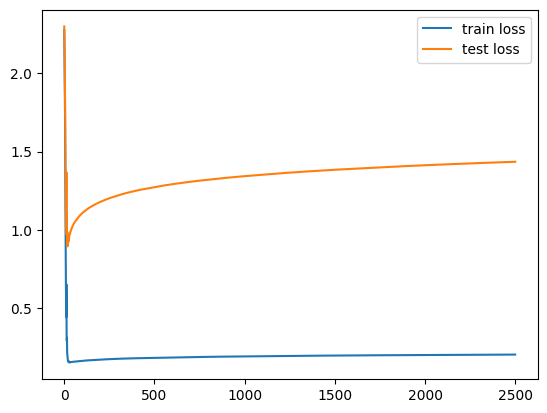

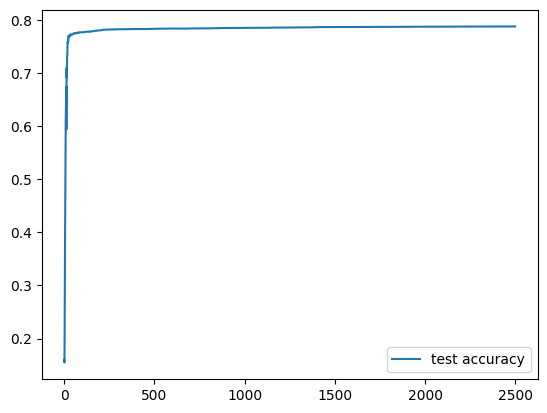

max accuracy: 0.7873


In [5]:
def supervised_train(model):

    batch_size = 32
    lr = 0.001
    momentum = 0.9
    num_epochs = 2500

    #defining a stocastic gradient descent optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)

    #defining loss function
    loss_fn = torch.nn.CrossEntropyLoss()

    train_hist = []
    test_hist = []
    test_accuracy = []

    for epoch in tqdm(range(num_epochs)):

        #iterating over all batches
        for i in range(int(len(train_x)/batch_size)-1):

            #Put the model in training mode, so that things like dropout work
            model.train(True)


            # Zero gradients for the optimizer
            optimizer.zero_grad()


            #extracting X and y values from the batch
            X = torch_train_x[i*batch_size: (i+1)*batch_size]
            y = torch_train_y[i*batch_size: (i+1)*batch_size]

            # Make predictions for this batch
            y_pred = model(X)

            #compute gradients with the loss function
            loss = loss_fn(y_pred, y)
            loss.backward()


            # Adjust learning weights
            optimizer.step()

        with torch.no_grad():

            #Disable things like dropout, if they exist
            model.train(False)

            #calculating epoch training and test loss
            train_loss = loss_fn(model(torch_train_x), torch_train_y).cpu().numpy()
            y_pred_test = model(torch_test_x)
            test_loss = loss_fn(y_pred_test, torch_test_y).cpu().numpy()

            train_hist.append(train_loss) # use train loss to plot
            test_hist.append(test_loss) # use test loss to plot

            #computing test accuracy
            matches = np.equal(np.argmax(y_pred_test.cpu().numpy(), axis=1), np.argmax(torch_test_y.cpu().numpy(), axis=1))
            test_accuracy.append(np.mean(matches))

    import matplotlib.pyplot as plt
    plt.plot(train_hist, label = 'train loss')
    plt.plot(test_hist, label = 'test loss')
    plt.legend()
    plt.show()
    plt.plot(test_accuracy, label = 'test accuracy')
    plt.legend()
    plt.show()

    maxacc = np.max(test_accuracy)
    print('max accuracy: {}'.format(maxacc))

    return maxacc

supervised_maxacc = supervised_train(model_baseline)

بله، دقت به دست آمده مشخصا بالاتر از Chance Level هست.

# Data Augmentation

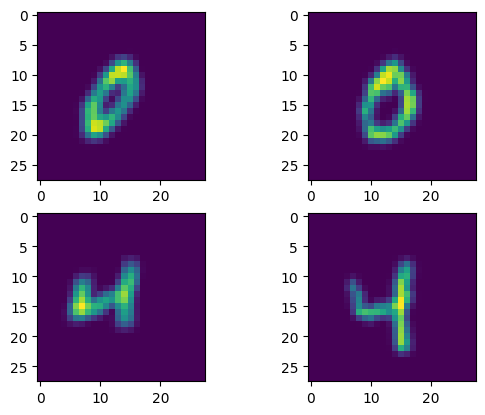

In [6]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt

class Augment:

   def __init__(self):

       blur = T.GaussianBlur((3,3))

       self.train_transform = torch.nn.Sequential(
           T.RandomAffine(45),
           T.RandomPerspective(),
           T.RandomPerspective(),
           T.RandomPerspective(0.2,0.5),
           T.RandomApply([blur]),
           T.RandomApply([blur])
       )

   def __call__(self, x):
       return self.train_transform(x), self.train_transform(x)

"""
Generating Test Augmentation
"""
a = Augment()
aug = a(torch_train_unlabeled[0:100])

i=1
f, axarr = plt.subplots(2,2)
#positive pair
axarr[0,0].imshow(aug[0].cpu().detach().numpy()[i,0])
axarr[0,1].imshow(aug[1].cpu().detach().numpy()[i,0])
#another positive pair
axarr[1,0].imshow(aug[0].cpu().detach().numpy()[i+1,0])
axarr[1,1].imshow(aug[1].cpu().detach().numpy()[i+1,0])
plt.show()

# Defining Contrastive Loss

In [9]:
# class ContrastiveLoss(nn.Module):
#    def __init__(self, batch_size, temperature=0.5):

#        super().__init__()
#        self.batch_size = batch_size
#        self.temperature = temperature
#        self.mask = (~torch.eye(batch_size * 2, batch_size * 2, dtype=bool)).float().to(device)

#    def calc_similarity_batch(self, a, b):
#        representations = torch.cat([a, b], dim=0)
#        return F.cosine_similarity(representations.unsqueeze(1), representations.unsqueeze(0), dim=2)

#    def forward(self, proj_1, proj_2):
#        batch_size = proj_1.shape[0]
#        z_i = F.normalize(proj_1, p=2, dim=1)
#        z_j = F.normalize(proj_2, p=2, dim=1)

#        similarity_matrix = self.calc_similarity_batch(z_i, z_j)

#        sim_ij = torch.diag(similarity_matrix, batch_size)
#        sim_ji = torch.diag(similarity_matrix, -batch_size)

#        positives = torch.cat([sim_ij, sim_ji], dim=0)

#        nominator = torch.exp(positives / self.temperature)

#        denominator = self.mask * torch.exp(similarity_matrix / self.temperature)

#        all_losses = -torch.log(nominator / torch.sum(denominator, dim=1))
#        loss = torch.sum(all_losses) / (2 * self.batch_size)
#        return loss

class ContrastiveLoss(nn.Module):
   def __init__(self, temperature=0.5):
       super().__init__()
       self.temperature = temperature

   def calc_similarity_batch(self, a, b):
       representations = torch.cat([a, b], dim=0)
       return F.cosine_similarity(representations.unsqueeze(1), representations.unsqueeze(0), dim=2)

   def forward(self, proj_1, proj_2):
       batch_size = proj_1.shape[0]
       z_i = F.normalize(proj_1, p=2, dim=1)
       z_j = F.normalize(proj_2, p=2, dim=1)
       
       similarity_matrix = self.calc_similarity_batch(z_i, z_j)
       
       mask = (~torch.eye(batch_size * 2, batch_size * 2, dtype=bool)).float().to(device)
       sim_ij = torch.diag(similarity_matrix, batch_size)
       sim_ji = torch.diag(similarity_matrix, -batch_size)
       
       positives = torch.cat([sim_ij, sim_ji], dim=0)
       
       nominator = torch.exp(positives / self.temperature)
       
       denominator = mask * torch.exp(similarity_matrix / self.temperature)
       
       all_losses = -torch.log(nominator / torch.sum(denominator, dim=1))
       loss = torch.sum(all_losses) / (2 * batch_size)
       return loss

loss = ContrastiveLoss()
fake_proj_0, fake_proj_1 = a(torch_train_x)
fake_proj_0 = fake_proj_0[:,0,:,0]
fake_proj_1 = fake_proj_1[:,0,:,0]
loss(fake_proj_0, fake_proj_1)

tensor(5.9836, device='cuda:0', grad_fn=<DivBackward0>)

# Training on whole data

In [12]:
from torch.optim.lr_scheduler import ExponentialLR

model = Model()
model.train()

#defining key hyperparameters
batch_size = 512
epoch_size = int(len(torch_train_unlabeled) / batch_size)
num_epochs = 75
patience = 5
cutoff_ratio = 0.001

#defining key learning functions
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_examples = len(torch_train_unlabeled)
lossfn = ContrastiveLoss()
augmentfn = Augment()

#for book keeping
loss_hist = []
improvement_hist = []
schedule_hist = []

#for exponentially decreasing learning rate
scheduler = ExponentialLR(optimizer, gamma = 0.95)

#for early stopping
patience_count = 0

#Training Loop
avg_loss = 1e10
for i in range(num_epochs):

    print('epoch {}/{}'.format(i,num_epochs))

    total_loss = 0
    loss_change = 0

    for j in tqdm(range(epoch_size)):

        #getting random batch
        X = torch_train_unlabeled[j*batch_size: (j+1)*batch_size]

        #creating pairs of augmented batches
        X_aug_i, X_aug_j = augmentfn(X)

        #ensuring gradients are zero
        optimizer.zero_grad()

        #passing through the model
        z_i = model(X_aug_i) 
        z_j = model(X_aug_j) 

        #calculating loss on the model embeddings, and computing gradients
        loss = lossfn(z_i, z_j)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        if True:
            z_i = model(X_aug_i)
            z_j = model(X_aug_j)

            #calculating new loss value
            new_loss = lossfn(z_i, z_j)

            loss_change += new_loss.cpu().detach().numpy() - loss.cpu().detach().numpy()

        total_loss += loss_change

        #step learning rate scheduler
        schedule_hist.append(scheduler.get_last_lr())

    #########################
    # update scheduler here #
    scheduler.step()
    #########################

    #calculating percentage loss reduction
    new_avg_loss = total_loss/epoch_size
    per_loss_reduction = (avg_loss-new_avg_loss)/avg_loss
    print('Percentage Loss Reduction: {}'.format(per_loss_reduction))

    #deciding to stop if loss is not decreasing fast enough
    if per_loss_reduction < cutoff_ratio:
        patience_count+=1
        print('patience counter: {}'.format(patience_count))
        if patience_count > patience:
            break
    else:
        patience_count = 0

    #setting new loss as previous loss
    avg_loss = new_avg_loss

    #book keeping
    avg_improvement = loss_change/epoch_size
    loss_hist.append(avg_loss)
    improvement_hist.append(avg_improvement)
    print('Average Loss: {}'.format(avg_loss))
    print('Average Loss change (if calculated): {}'.format(avg_improvement))

epoch 0/75


100%|██████████| 116/116 [00:29<00:00,  3.88it/s]


Percentage Loss Reduction: 1.0000000000665836
Average Loss: -0.6658354134395205
Average Loss change (if calculated): -0.01715189424054376
epoch 1/75


100%|██████████| 116/116 [00:29<00:00,  3.90it/s]


Percentage Loss Reduction: -1.7258890269821117
patience counter: 1
Average Loss: -1.8149934472708866
Average Loss change (if calculated): -0.030629914382408405
epoch 2/75


100%|██████████| 116/116 [00:29<00:00,  3.91it/s]


Percentage Loss Reduction: -0.06926821479903318
patience counter: 2
Average Loss: -1.9407148032352841
Average Loss change (if calculated): -0.03012679774185707
epoch 3/75


100%|██████████| 116/116 [00:29<00:00,  3.90it/s]


Percentage Loss Reduction: 0.055124342743396705
Average Loss: -1.8337341752545586
Average Loss change (if calculated): -0.0319016719686574
epoch 4/75


100%|██████████| 116/116 [00:29<00:00,  3.90it/s]


Percentage Loss Reduction: 0.19426947910219322
Average Loss: -1.4774955922159656
Average Loss change (if calculated): -0.026177731053582554
epoch 5/75


100%|██████████| 116/116 [00:29<00:00,  3.91it/s]


Percentage Loss Reduction: 0.14608863451278195
Average Loss: -1.261650278650481
Average Loss change (if calculated): -0.022027735052437616
epoch 6/75


100%|██████████| 116/116 [00:29<00:00,  3.92it/s]


Percentage Loss Reduction: -0.025107327304556892
patience counter: 1
Average Loss: -1.293326945140444
Average Loss change (if calculated): -0.024167656898498535
epoch 7/75


100%|██████████| 116/116 [00:29<00:00,  3.94it/s]


Percentage Loss Reduction: 0.15813134638054316
Average Loss: -1.0888114139951508
Average Loss change (if calculated): -0.020278499044221025
epoch 8/75


100%|██████████| 116/116 [00:29<00:00,  3.92it/s]


Percentage Loss Reduction: 0.040834280800006194
Average Loss: -1.044350582977821
Average Loss change (if calculated): -0.01871511853974441
epoch 9/75


100%|██████████| 116/116 [00:29<00:00,  3.92it/s]


Percentage Loss Reduction: 0.16780479172729398
Average Loss: -0.8691035509109497
Average Loss change (if calculated): -0.01531679054786419
epoch 10/75


100%|██████████| 116/116 [00:29<00:00,  3.92it/s]


Percentage Loss Reduction: -0.19498141342271944
patience counter: 1
Average Loss: -1.038562589678271
Average Loss change (if calculated): -0.018095291894057702
epoch 11/75


100%|██████████| 116/116 [00:29<00:00,  3.94it/s]


Percentage Loss Reduction: 0.25033117753912454
Average Loss: -0.7785779936560269
Average Loss change (if calculated): -0.013423109876698461
epoch 12/75


100%|██████████| 116/116 [00:29<00:00,  3.92it/s]


Percentage Loss Reduction: -0.07802482098856624
patience counter: 1
Average Loss: -0.8393264022366754
Average Loss change (if calculated): -0.013634780357623923
epoch 13/75


100%|██████████| 116/116 [00:29<00:00,  3.95it/s]


Percentage Loss Reduction: 0.06007783963008613
Average Loss: -0.7889014852458033
Average Loss change (if calculated): -0.012420469316942939
epoch 14/75


100%|██████████| 116/116 [00:29<00:00,  3.95it/s]


Percentage Loss Reduction: 0.18713711359650928
Average Loss: -0.6412687383849045
Average Loss change (if calculated): -0.01063919889515844
epoch 15/75


100%|██████████| 116/116 [00:29<00:00,  3.94it/s]


Percentage Loss Reduction: -0.04165992045830935
patience counter: 1
Average Loss: -0.66798394301842
Average Loss change (if calculated): -0.011097760036073882
epoch 16/75


100%|██████████| 116/116 [00:29<00:00,  3.93it/s]


Percentage Loss Reduction: -0.1318871542613656
patience counter: 2
Average Loss: -0.7560824443554056
Average Loss change (if calculated): -0.012780386826087689
epoch 17/75


100%|██████████| 116/116 [00:29<00:00,  3.96it/s]


Percentage Loss Reduction: 0.3689544376908458
Average Loss: -0.47712247125033674
Average Loss change (if calculated): -0.00806150354188064
epoch 18/75


100%|██████████| 116/116 [00:29<00:00,  3.94it/s]


Percentage Loss Reduction: 0.09396668069505447
Average Loss: -0.43228885634192105
Average Loss change (if calculated): -0.007554531097412109
epoch 19/75


100%|██████████| 116/116 [00:29<00:00,  3.98it/s]


Percentage Loss Reduction: -0.34625590956630653
patience counter: 1
Average Loss: -0.5819714274899713
Average Loss change (if calculated): -0.010323553249753755
epoch 20/75


100%|██████████| 116/116 [00:29<00:00,  3.98it/s]


Percentage Loss Reduction: 0.22971504169404453
Average Loss: -0.44828383675936995
Average Loss change (if calculated): -0.009579185781807735
epoch 21/75


100%|██████████| 116/116 [00:29<00:00,  3.98it/s]


Percentage Loss Reduction: -0.16377346588534739
patience counter: 1
Average Loss: -0.5217008344058333
Average Loss change (if calculated): -0.009667174569491682
epoch 22/75


100%|██████████| 116/116 [00:29<00:00,  3.94it/s]


Percentage Loss Reduction: 0.14517909257743652
Average Loss: -0.4459607806699029
Average Loss change (if calculated): -0.007841718607935411
epoch 23/75


100%|██████████| 116/116 [00:29<00:00,  3.92it/s]


Percentage Loss Reduction: -0.02342396626229747
patience counter: 1
Average Loss: -0.45640695095062256
Average Loss change (if calculated): -0.007912878332466915
epoch 24/75


100%|██████████| 116/116 [00:29<00:00,  3.93it/s]


Percentage Loss Reduction: -0.13052036742770426
patience counter: 2
Average Loss: -0.515977353885256
Average Loss change (if calculated): -0.008533794304420209
epoch 25/75


100%|██████████| 116/116 [00:29<00:00,  3.95it/s]


Percentage Loss Reduction: 0.22451426913933817
Average Loss: -0.4001330753852581
Average Loss change (if calculated): -0.007068342175976983
epoch 26/75


100%|██████████| 116/116 [00:29<00:00,  3.97it/s]


Percentage Loss Reduction: -0.029304318648284283
patience counter: 1
Average Loss: -0.41185870252806567
Average Loss change (if calculated): -0.007340772398586931
epoch 27/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: 0.04469466667312097
Average Loss: -0.3934508151021497
Average Loss change (if calculated): -0.006515667356293777
epoch 28/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: 0.11810683914743023
Average Loss: -0.3469815829704548
Average Loss change (if calculated): -0.00699043684992297
epoch 29/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: 0.1415577466208362
Average Loss: -0.2978636519662265
Average Loss change (if calculated): -0.0052967975879537645
epoch 30/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: -0.062306326472929136
patience counter: 1
Average Loss: -0.31642244191005314
Average Loss change (if calculated): -0.006234987028713884
epoch 31/75


100%|██████████| 116/116 [00:28<00:00,  4.04it/s]


Percentage Loss Reduction: 0.07140473746021343
Average Loss: -0.29382838051894616
Average Loss change (if calculated): -0.004359903006718077
epoch 32/75


100%|██████████| 116/116 [00:28<00:00,  4.04it/s]


Percentage Loss Reduction: -0.004721576062022286
patience counter: 1
Average Loss: -0.2952157135667472
Average Loss change (if calculated): -0.0049524800530795395
epoch 33/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: -0.1179045473595131
patience counter: 2
Average Loss: -0.3300229886482502
Average Loss change (if calculated): -0.005323586792781435
epoch 34/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: 0.15689556340781852
Average Loss: -0.2782438459067509
Average Loss change (if calculated): -0.004355895108190076
epoch 35/75


100%|██████████| 116/116 [00:28<00:00,  4.04it/s]


Percentage Loss Reduction: 0.03705997661810805
Average Loss: -0.26793213548331424
Average Loss change (if calculated): -0.004810148272021064
epoch 36/75


100%|██████████| 116/116 [00:28<00:00,  4.05it/s]


Percentage Loss Reduction: 0.09897294484949866
Average Loss: -0.24141410301471578
Average Loss change (if calculated): -0.004624358538923593
epoch 37/75


100%|██████████| 116/116 [00:28<00:00,  4.04it/s]


Percentage Loss Reduction: 0.2347485863815864
Average Loss: -0.18474248359943257
Average Loss change (if calculated): -0.00375002828137628
epoch 38/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: 0.10696806451730606
Average Loss: -0.1649809376946811
Average Loss change (if calculated): -0.003384051651790224
epoch 39/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: -0.28078984818481445
patience counter: 1
Average Loss: -0.21130591014335895
Average Loss change (if calculated): -0.0038323525724739864
epoch 40/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: -0.02785881129697472
patience counter: 2
Average Loss: -0.21719264161997828
Average Loss change (if calculated): -0.003308407191572518
epoch 41/75


100%|██████████| 116/116 [00:28<00:00,  4.04it/s]


Percentage Loss Reduction: 0.3507648916256063
Average Loss: -0.14100908822026745
Average Loss change (if calculated): -0.0023437368458714978
epoch 42/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: -0.018907841008203773
patience counter: 1
Average Loss: -0.14367526564104804
Average Loss change (if calculated): -0.0022902365388541386
epoch 43/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: -0.3049264174415593
patience counter: 2
Average Loss: -0.18748564966793718
Average Loss change (if calculated): -0.0033054680659853177
epoch 44/75


100%|██████████| 116/116 [00:28<00:00,  4.02it/s]


Percentage Loss Reduction: -0.02397676890801305
patience counter: 3
Average Loss: -0.191980949763594
Average Loss change (if calculated): -0.003121782993448192
epoch 45/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: 0.29300011658746244
Average Loss: -0.1357305091002892
Average Loss change (if calculated): -0.0024514938222950904
epoch 46/75


100%|██████████| 116/116 [00:28<00:00,  4.01it/s]


Percentage Loss Reduction: -0.05964570033396719
patience counter: 1
Average Loss: -0.14382625037226185
Average Loss change (if calculated): -0.002409614365676354
epoch 47/75


100%|██████████| 116/116 [00:28<00:00,  4.01it/s]


Percentage Loss Reduction: -0.07809338475471363
patience counter: 2
Average Loss: -0.15505812908041067
Average Loss change (if calculated): -0.002816352350958462
epoch 48/75


100%|██████████| 116/116 [00:28<00:00,  4.01it/s]


Percentage Loss Reduction: 0.3155985215000244
Average Loss: -0.10612201279607313
Average Loss change (if calculated): -0.0019585757419980808
epoch 49/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: -0.18125001283105924
patience counter: 1
Average Loss: -0.1253566289770192
Average Loss change (if calculated): -0.0020594884609353953
epoch 50/75


100%|██████████| 116/116 [00:28<00:00,  4.02it/s]


Percentage Loss Reduction: 0.25444009519974137
Average Loss: -0.09346087636618779
Average Loss change (if calculated): -0.0017071263543490705
epoch 51/75


100%|██████████| 116/116 [00:28<00:00,  4.01it/s]


Percentage Loss Reduction: 0.06667607017586447
Average Loss: -0.08722927241489806
Average Loss change (if calculated): -0.0014925537438228212
epoch 52/75


100%|██████████| 116/116 [00:28<00:00,  4.04it/s]


Percentage Loss Reduction: -0.05474911609123235
patience counter: 1
Average Loss: -0.09200499797689504
Average Loss change (if calculated): -0.0016842299494250067
epoch 53/75


100%|██████████| 116/116 [00:29<00:00,  3.97it/s]


Percentage Loss Reduction: -0.20627032714023774
patience counter: 2
Average Loss: -0.11098289900812609
Average Loss change (if calculated): -0.0020050920289138266
epoch 54/75


100%|██████████| 116/116 [00:29<00:00,  3.98it/s]


Percentage Loss Reduction: 0.17770850959908585
Average Loss: -0.09126029343440614
Average Loss change (if calculated): -0.0016327520896648538
epoch 55/75


100%|██████████| 116/116 [00:28<00:00,  4.01it/s]


Percentage Loss Reduction: -0.08370162990997923
patience counter: 1
Average Loss: -0.09889892874092891
Average Loss change (if calculated): -0.0016843327160539299
epoch 56/75


100%|██████████| 116/116 [00:29<00:00,  4.00it/s]


Percentage Loss Reduction: -0.01239152443985243
patience counter: 2
Average Loss: -0.10012443723349736
Average Loss change (if calculated): -0.0016413022731912546
epoch 57/75


100%|██████████| 116/116 [00:28<00:00,  4.00it/s]


Percentage Loss Reduction: 0.0540762529080169
Average Loss: -0.09471008284338589
Average Loss change (if calculated): -0.0018469341870011955
epoch 58/75


100%|██████████| 116/116 [00:28<00:00,  4.02it/s]


Percentage Loss Reduction: 0.20154984657827024
Average Loss: -0.0756212801768862
Average Loss change (if calculated): -0.001449309546371986
epoch 59/75


100%|██████████| 116/116 [00:28<00:00,  4.01it/s]


Percentage Loss Reduction: 0.11159821227687378
Average Loss: -0.0671820804990571
Average Loss change (if calculated): -0.0012139904087987438
epoch 60/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: -0.0008150710747361549
patience counter: 1
Average Loss: -0.06723683866961248
Average Loss change (if calculated): -0.0011659120691233668
epoch 61/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: -0.05843502113906867
patience counter: 2
Average Loss: -0.07116582475859544
Average Loss change (if calculated): -0.0011947031678824589
epoch 62/75


100%|██████████| 116/116 [00:28<00:00,  4.02it/s]


Percentage Loss Reduction: -0.07666040297856723
patience counter: 3
Average Loss: -0.07662142556289146
Average Loss change (if calculated): -0.0011332076171348836
epoch 63/75


100%|██████████| 116/116 [00:29<00:00,  4.00it/s]


Percentage Loss Reduction: -0.07172086667218176
patience counter: 4
Average Loss: -0.0821167806099201
Average Loss change (if calculated): -0.0012742897559856546
epoch 64/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: 0.2250127261911848
Average Loss: -0.06363945993883856
Average Loss change (if calculated): -0.0010237077186847556
epoch 65/75


100%|██████████| 116/116 [00:28<00:00,  4.04it/s]


Percentage Loss Reduction: 0.11932656863512611
Average Loss: -0.05604558155454438
Average Loss change (if calculated): -0.0009925036594785493
epoch 66/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: -0.0060302087663747185
patience counter: 1
Average Loss: -0.05638354811175116
Average Loss change (if calculated): -0.0010497775571099643
epoch 67/75


100%|██████████| 116/116 [00:28<00:00,  4.02it/s]


Percentage Loss Reduction: 0.26185884712503016
Average Loss: -0.04161901720638933
Average Loss change (if calculated): -0.0008623065619633116
epoch 68/75


100%|██████████| 116/116 [00:28<00:00,  4.02it/s]


Percentage Loss Reduction: -0.3143062920835825
patience counter: 1
Average Loss: -0.05470013618469238
Average Loss change (if calculated): -0.0010396612101587757
epoch 69/75


100%|██████████| 116/116 [00:28<00:00,  4.02it/s]


Percentage Loss Reduction: 0.21697614813147056
Average Loss: -0.042831511333070955
Average Loss change (if calculated): -0.000841490153608651
epoch 70/75


100%|██████████| 116/116 [00:28<00:00,  4.01it/s]


Percentage Loss Reduction: 0.05693411056041859
Average Loss: -0.04039293733136407
Average Loss change (if calculated): -0.0007140965297304351
epoch 71/75


100%|██████████| 116/116 [00:28<00:00,  4.01it/s]


Percentage Loss Reduction: -0.14193972853671885
patience counter: 1
Average Loss: -0.046126299890978585
Average Loss change (if calculated): -0.0007529340941330482
epoch 72/75


100%|██████████| 116/116 [00:28<00:00,  4.04it/s]


Percentage Loss Reduction: 0.2173978409300741
Average Loss: -0.03609854188458673
Average Loss change (if calculated): -0.0005743298037298795
epoch 73/75


100%|██████████| 116/116 [00:28<00:00,  4.03it/s]


Percentage Loss Reduction: 0.038940161670678174
Average Loss: -0.03469285882752517
Average Loss change (if calculated): -0.0005932059781304721
epoch 74/75


100%|██████████| 116/116 [00:28<00:00,  4.04it/s]

Percentage Loss Reduction: -0.252641112814301
patience counter: 1
Average Loss: -0.04345770128842058
Average Loss change (if calculated): -0.0008113219820219895


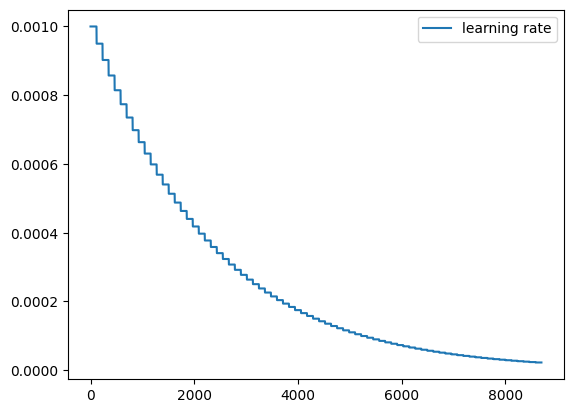

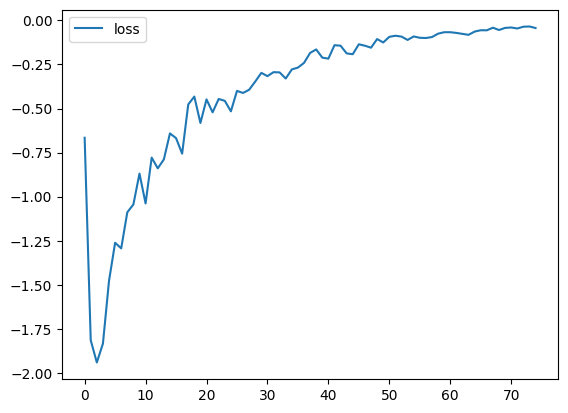

In [13]:
plt.plot(schedule_hist, label='learning rate')
plt.legend()
plt.show()
plt.plot(loss_hist, label = 'loss')
plt.legend()
plt.show()